# Importing Packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures

# Reading the Dataset

In [16]:
df = pd.read_csv('cleaned_dataset.csv')

In [17]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,horsepower-binned
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,0,1,Low
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,0,1,Low
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,0,1,Medium
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,0,1,Low
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,0,1,Low


# Drop the First Column 

In [18]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [19]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,horsepower-binned
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,0,1,Low
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,0,1,Low
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,0,1,Medium
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,0,1,Low
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,0,1,Low


# Get the Summary of the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

# Part 1: Training and Testing :

An Important step in "Testing" your model is to Split your data into training and testing data.

We will place the target variable in a separate dataframe y_data :

In [8]:
y_data = df[['price']]

Drop the 'Price' column in x_data : 

In [9]:
x_data = df

In [10]:
x_data.drop("price" , axis = 1 , inplace = True)

In [11]:
x_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas,horsepower-binned
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,11.190476,0,1,Low
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,11.190476,0,1,Low
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,12.368421,0,1,Medium
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,9.791667,0,1,Low
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,13.055556,0,1,Low


Now , we randomly split our data into training and testing data using the function "train_test_split"

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.10 , random_state = 1)

Get the Size of training and testing data :

In [13]:
print("number of training samples : " , x_train.shape[0])
print("number of testing samples : " , x_test.shape[0])

number of training samples :  180
number of testing samples :  21


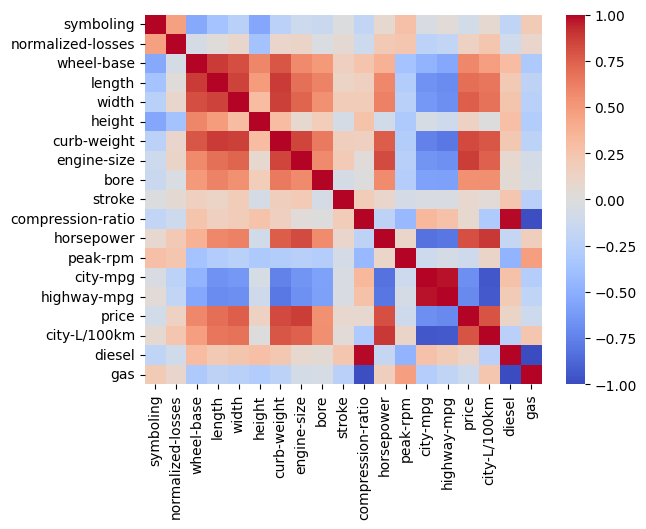

In [20]:
# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(df.corr(numeric_only = True), cmap='coolwarm', annot=False)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

Create Linear Regression Object : 

In [21]:
lr = LinearRegression()

Fit the model using the feature "horsepower"

In [22]:
lr.fit(x_train[['horsepower']] , y_train)

LinearRegression()

Regression Plot for correlation between 'horsepower' and 'price'

Text(0.5, 1.0, "Regression plot for Correlation between 'horsepower' and 'price'")

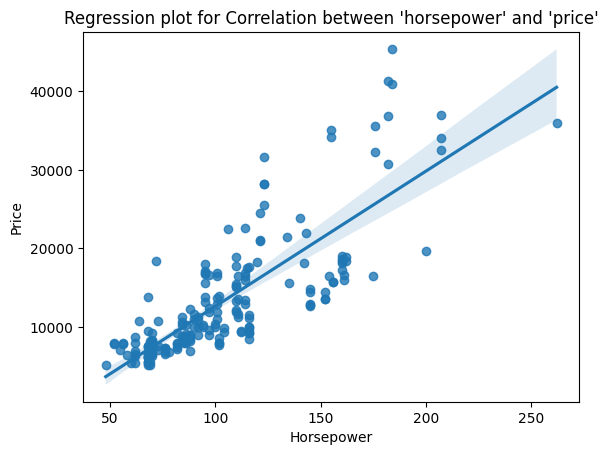

In [23]:
x = df['horsepower']
y = df['price']
sns.regplot(x = 'horsepower' , y = 'price' , data = df)
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Regression plot for Correlation between 'horsepower' and 'price'")

Calculate the pearson correlation between 'horsepower' and 'price'

In [24]:
pearson_coef_horsepower , p_value_horsepower = stats.pearsonr(df['horsepower'] , df['price'])

In [25]:
print("The Correlation between 'horsepower' and 'price' : ")
print("Pearson Coefficient : "  , pearson_coef_horsepower)
print("P-value : "  , p_value_horsepower)

The Correlation between 'horsepower' and 'price' : 
Pearson Coefficient :  0.8096068016571054
P-value :  6.273536270650436e-48


From the result we see that : 

    1) coefficient is close to 1
    2) p-value < 0.001
    
So, the correlation between 'horsepower' and 'price' is "Large Positive Relationship with Strong cretainty in result"

Calculate the R^2 on "Training Data" :

In [26]:
print("R^2 on Training Data : " , lr.score(x_train[['horsepower']] , y_train))

R^2 on Training Data :  0.662028747521533


Calculate the R^2 on "Testing Data" : 

In [27]:
print("R^2 on Testing Data : " , lr.score(x_test[['horsepower']] , y_test))

R^2 on Testing Data :  0.3635480624962413


# Cross-Validation Score

Use the method "cross_val_score" and its inputs are "Learning Regression object , the Feature 'horsepower' , the target data 'price' , and the number of folds (Here , we assume to use 4 folds)" 

In [28]:
R2cross = cross_val_score(lr , x_data[['horsepower']] , y_data , cv=4)
print("Our new R^2 from Cross-validation score : " , R2cross)

Our new R^2 from Cross-validation score :  [0.77465419 0.51718424 0.74814454 0.04825398]


calculate the mean and standard deviation of the R^2 Cross : 

In [29]:
print("The Mean of the folds are : " , R2cross.mean())
print("The standard deviation is : " , R2cross.std())

The Mean of the folds are :  0.5220592359225417
The standard deviation is :  0.291304806661184


# Getting the prediction using "cross_val_predict" method : 

Use the method "cross_val_predict" to predict the output.

This method splits up the data into the specified number of folds , with one fold for testing and the other folds for training.

In [32]:
yhat = cross_val_predict(lr , x_test[['horsepower']] , y_test , cv = 4)

In [33]:
yhat[0 : 5]

array([[11702.47316394],
       [ 7562.58184824],
       [ 9846.65981552],
       [ 8704.62083188],
       [14414.81575009]])

# Getting the prediction using Linear Regression 'predict' method : 

In [34]:
yhat_p = lr.predict(x_test[['horsepower']])

In [35]:
yhat_p[0 : 5]

array([[12182.031041  ],
       [ 7170.0022055 ],
       [ 9935.25949405],
       [ 8552.63084978],
       [15465.77407115]])

# Part 2: Overfitting , Underfitting , and Model Selection : 

Our "Testing Data" will refer to be as "Out-of-sample Data" , is a much better measure of how well our model performs in the real world.

That should be more apparent in "Multiple Linear Regression" and "Polynomial Regression".

# Let's create "Multiple Linear Regression" and train the model using :
1) 'horsepower'
2) 'curb-weight'
3) 'engine-size'
4) 'highway-mpg'

In [37]:
x_train_mlr = x_train[['horsepower' , 'curb-weight' , 'engine-size' , 'highway-mpg']]
y_train_mlr = y_train
x_test_mlr = x_test[['horsepower' , 'curb-weight' , 'engine-size' , 'highway-mpg']]
y_test_mlr = y_test

In [38]:
lr = LinearRegression()

In [40]:
lr.fit(x_train_mlr , y_train_mlr)

LinearRegression()

# Getting the prediction using 'cross_val_predict' : 

Prediction on "Training Data" : 

In [41]:
yhat_cross_train = cross_val_predict(lr , x_train_mlr , y_train_mlr , cv = 4)

In [42]:
yhat_cross_train[0 : 5]

array([[ 7434.57968674],
       [28184.73583787],
       [13643.05475525],
       [ 3885.80936305],
       [34178.5206438 ]])

Prediction on "Testing Data" : 

In [43]:
yhat_cross_test = cross_val_predict(lr , x_test_mlr , y_test_mlr , cv = 4)
yhat_cross_test[0 : 5]

array([[ 9861.33850957],
       [ 6205.68409313],
       [12605.73552678],
       [ 5959.43471106],
       [13180.38579831]])

# Getting the prediction using 'predict' method of LinearRegression : 

Prediction on "Training Dataset" : 

In [44]:
yhat_train_mlr = lr.predict(x_train_mlr)

In [45]:
yhat_train_mlr[0 : 5]

array([[ 7426.34910902],
       [28324.42490838],
       [14212.74872339],
       [ 4052.80810192],
       [34499.8541269 ]])

Prediction on "Testing Dataset" : 

In [46]:
yhat_test_mlr = lr.predict(x_test_mlr)
yhat_test_mlr[0 : 5]

array([[11349.68099115],
       [ 5884.25292475],
       [11208.31007475],
       [ 6641.03017109],
       [15565.98722248]])

# Multiple Linear Regression Model Evaluation : 

In [76]:
def DistributionPlot(RedFunction , BlueFunction , RedName , BlueName , Title):
    width = 12
    height = 10
    plt.figure(figsize = (width , height))
    
    ax1 = sns.kdeplot(RedFunction , color = 'r' , label = RedName)
    ax2 = sns.kdeplot(BlueFunction , color = 'b' , label = BlueName)
    
    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of cars")
    plt.show()
    plt.close()

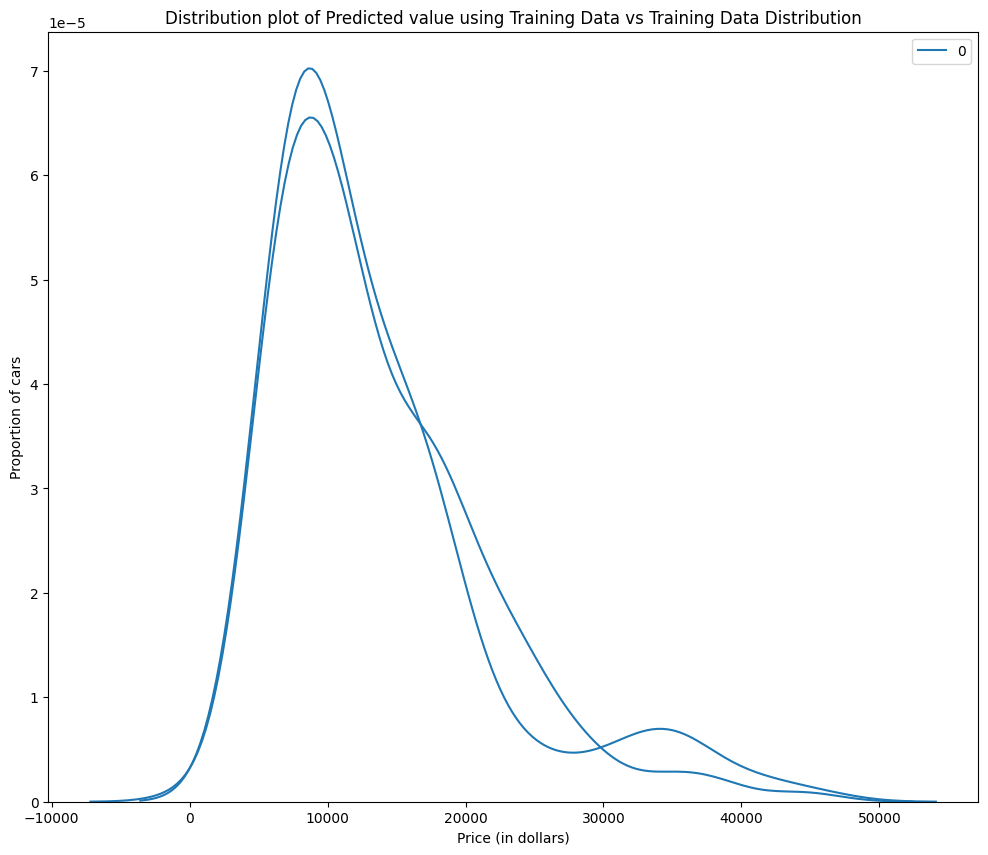

In [77]:
Title = "Distribution plot of Predicted value using Training Data vs Training Data Distribution"
DistributionPlot(y_train_mlr , yhat_train_mlr , "Actual Values (Train)" , "Predicted Values (Train)" , Title)

As we see the model seems to be doing well in Learning from the training dataset.

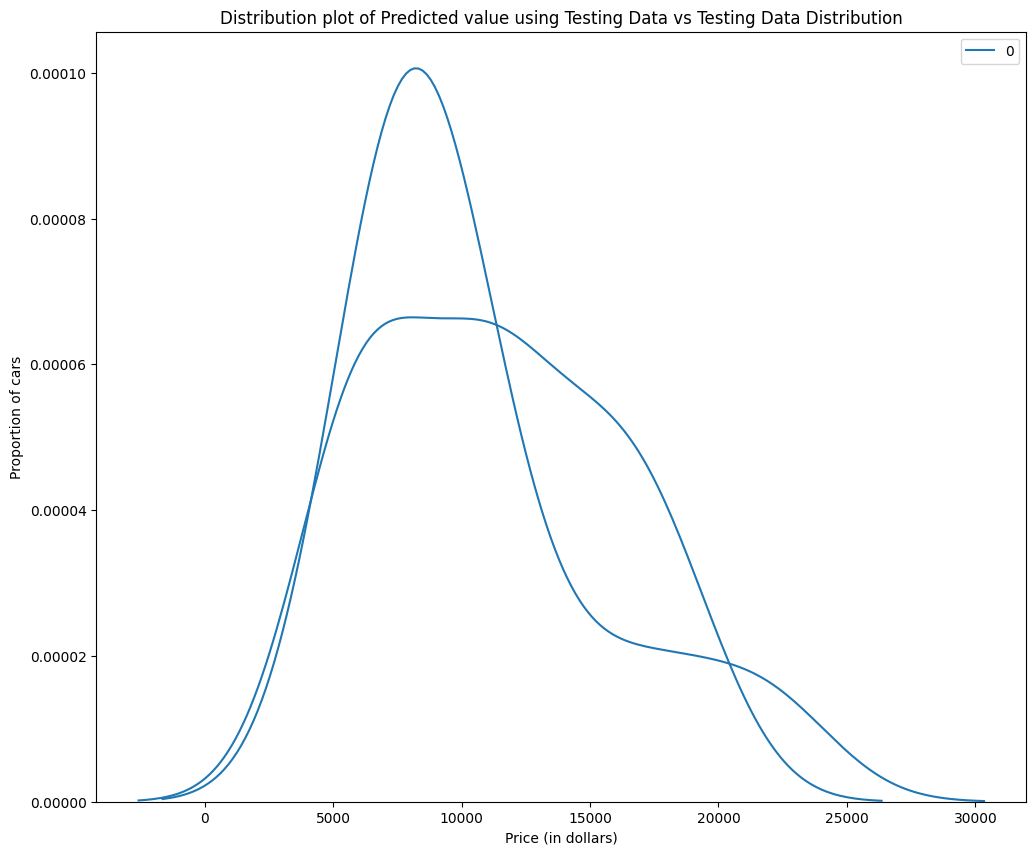

In [75]:
Title = "Distribution plot of Predicted value using Testing Data vs Testing Data Distribution"
DistributionPlot(y_test_mlr , yhat_test_mlr , "Actual Values (Test)" , "Predicted Values (Test)" , Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different .


# Let's create "Polynomial Regression" and train the model using degree 5 polynomial model :

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship .

Let's use 55% of the data for training and the rest for testing :

In [68]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.45 , random_state = 0)

Preform a degree 5 polynomial transformation on the feature 'horsepower' : 

In [69]:
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now , Let's Create a Linear Regression model 'poly' and train it :

In [70]:
poly = LinearRegression()
poly.fit(x_train_pr , y_train)

LinearRegression()

In [71]:
yhat_pr = poly.predict(x_test_pr)
yhat[0 : 5]

array([[11702.47316394],
       [ 7562.58184824],
       [ 9846.65981552],
       [ 8704.62083188],
       [14414.81575009]])

Let's take the first five predicted values and compare it to the actual targets:

In [72]:
print("Predicted Values : " , yhat[0 : 5])
print("Actual Values : " , y_test[0 : 5])

Predicted Values :  [[11702.47316394]
 [ 7562.58184824]
 [ 9846.65981552]
 [ 8704.62083188]
 [14414.81575009]]
Actual Values :         price
18    6295.0
170  10698.0
107  13860.0
98   13499.0
177  15750.0


Display the training data, testing data, and the predicted function:

In [73]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

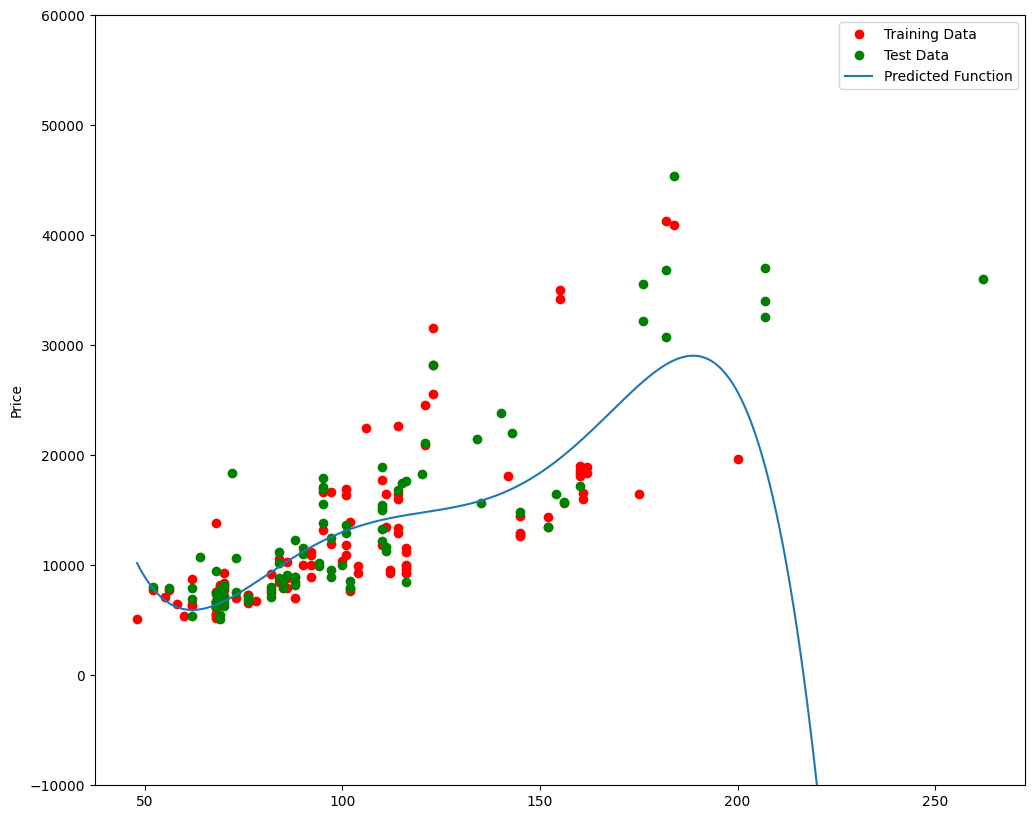

In [74]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

Let's calculate the R^2 of the training data : 

In [78]:
poly.score(x_train_pr , y_train)

0.5568527853911671

Let's calculate the R^2 of the Testing Data :

In [79]:
poly.score(x_test_pr , y_test)

-29.815558971873394

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

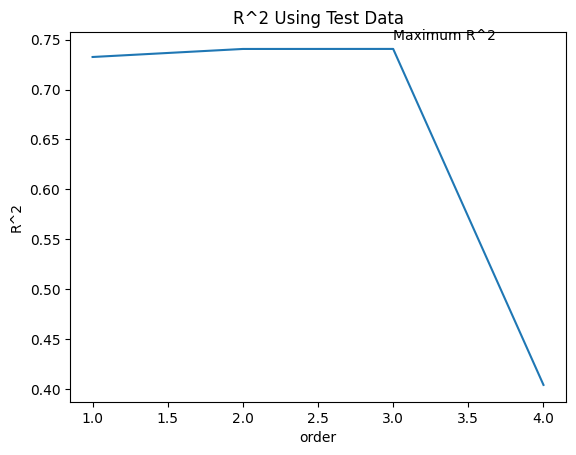

In [80]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.